In [ ]:
# TODO:- 
#  Evaluate the model performance
# Confusion matrix, classification report, plot_model
# Save the matplotlib plots
# save the models

In [77]:
# Question :- 
# In this assignment candidate will be able to create a model that can detect coronavirus patients 
# from X-ray reports

# Just info:-
# I have already download and unzip the kaggle dataset. It's name is Covid19-dataset.

In [78]:
# Importing all the necessary libraries

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, Input
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense # For model layers of CNN

In [79]:
train_dir = "C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/train"
test_dir = "C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/test"

In [80]:
os.listdir(train_dir)

['Covid', 'Normal', 'Viral Pneumonia']

In [81]:
x_train = []
for folder in os.listdir(train_dir):
    sub_path = train_dir + '/' + folder
    for image in os.listdir(sub_path):
        img_path = sub_path + '/' + image
        img = cv2.imread(img_path)
        img = cv2.resize(img,(224,224)) # Resnet-50 needs an input of shape 224x224
        x_train.append(img)

In [82]:
len(x_train)

251

In [83]:
# Total number of images in all the directories:- 
111 + 70 + 70

251

In [84]:
x_test = []
for folder in os.listdir(test_dir):
    sub_test = test_dir + '/' + folder
    for image in os.listdir(sub_test):
        img_test = sub_test + '/' + image
        imgtest = cv2.imread(img_test)
        imgtest = cv2.resize(imgtest,(224,224))
        x_test.append(imgtest)

In [85]:
len(x_test)

66

In [86]:
26 + 20 + 20

66

In [87]:
print("Maximum value of the first image in x_train", float(np.max(x_train[0])))
print("Minimum value of the first image in x_train", float(np.min(x_train[0])))

print("Maximum value of the first image in x_test", float(np.max(x_test[0])))
print("Minimum value of the first image in x_test", float(np.min(x_test[0])))


Maximum value of the first image in x_train 255.0
Minimum value of the first image in x_train 0.0
Maximum value of the first image in x_test 255.0
Minimum value of the first image in x_test 0.0


In [88]:
# Preprocessing the x_train and x_test

train = np.array(x_train)/255.0
test = np.array(x_test)/255.0

In [89]:
# But why there is a need for ImageDataGenerator? is the images are less. yes!

train_data = ImageDataGenerator(rescale = 1/255.0 , validation_split=0.2)
test_data = ImageDataGenerator(rescale = 1/255.0)

In [90]:
train_set = train_data.flow_from_directory(
                    train_dir,
                    subset = 'training',
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'sparse'
)
val_set = train_data.flow_from_directory(
                    train_dir,
                    subset = 'validation',
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'sparse'
)
test_set = test_data.flow_from_directory(
                    test_dir,
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'sparse'
)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


Found 66 images belonging to 3 classes.


In [91]:
y_train = train_set.classes 
y_val = val_set.classes
y_test = test_set.classes 
print(train_set.class_indices)
print("y_train :-", y_train)
print("y_val :- ", y_val)
print("y_test :- ", y_test)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
y_train :- [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
y_val :-  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
y_test :-  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [92]:
print('train data shape : ' , train.shape) # (Total number of images, height, width, colour channel)
print('test data shape : ' , test.shape)

train data shape :  (251, 224, 224, 3)
test data shape :  (66, 224, 224, 3)


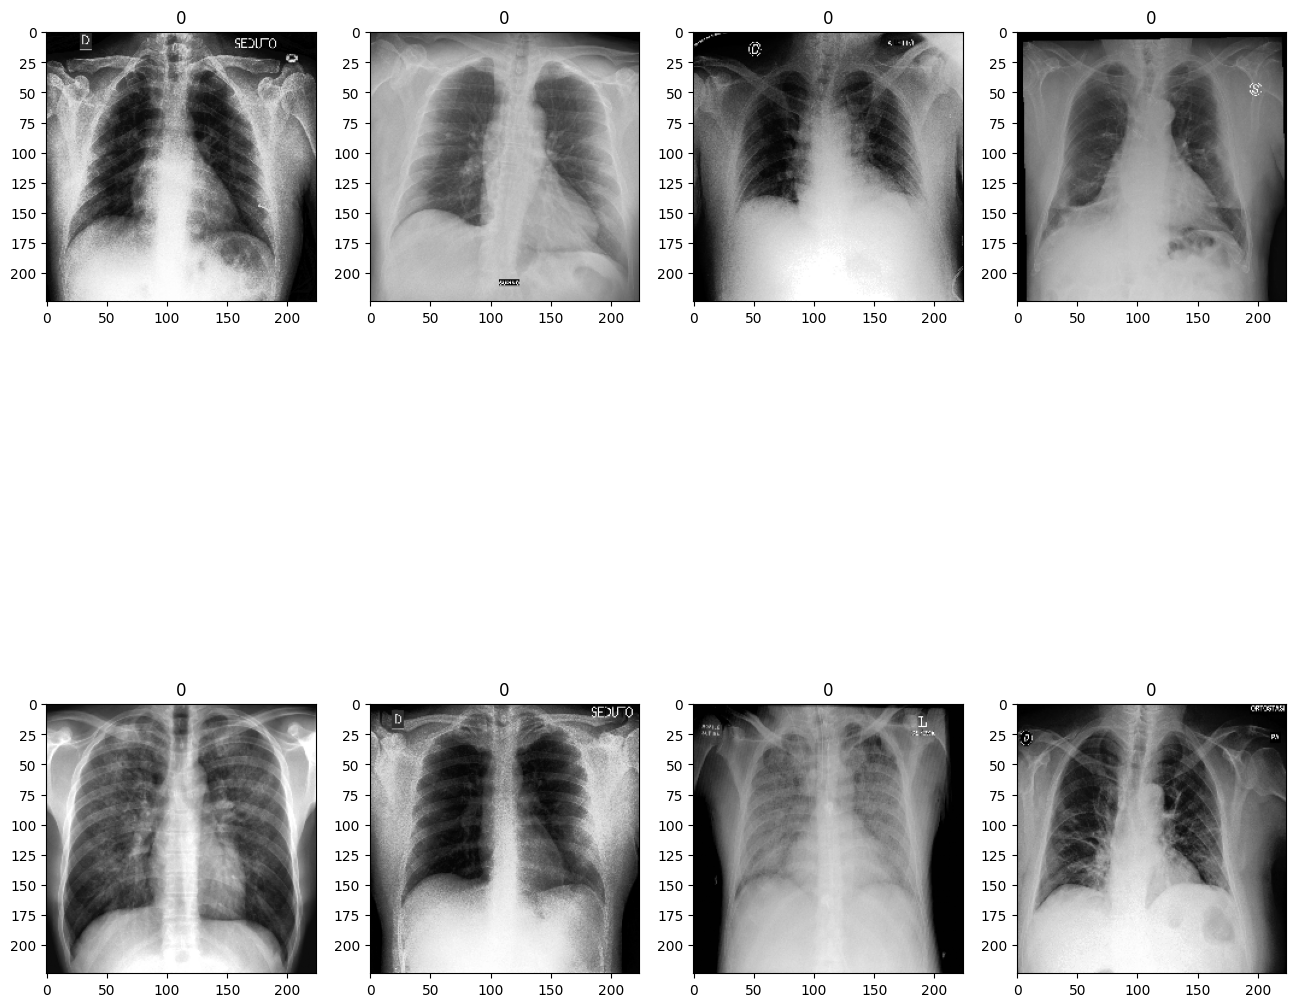

In [93]:
plt.figure(figsize=(16,16))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(train[i])
    plt.title(y_train[i])

In [94]:
# ResNet50 model tanser learning

resnet50 = ResNet50(include_top = False , input_shape = (224,224,3), weights='imagenet')
for layer in resnet50.layers :
    layer.trainable = False

In [95]:

# Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ES = EarlyStopping(
    monitor='val_loss',
    patience = 10,
    restore_best_weights=True,
    min_delta = 0.001,
    verbose = 0
)
model = Sequential([
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(factor=0.2),
    resnet50,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [96]:
# Fitting the model

training = model.fit(
    train_set,
    callbacks=[ES],
    steps_per_epoch = 7 ,
    epochs = 2, # 100
    validation_data = val_set
)
# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=30,
#     validation_data=val_generator,
#     validation_steps=val_generator.samples // batch_size,
#     callbacks=[early_stopping]
# )

Epoch 1/2
7/7 [==============================] - 41s 5s/step - loss: 1.3229 - accuracy: 0.3383 - val_loss: 1.2028 - val_accuracy: 0.2800
Epoch 2/2
7/7 [==============================] - 34s 5s/step - loss: 1.0664 - accuracy: 0.5124 - val_loss: 0.9410 - val_accuracy: 0.7000


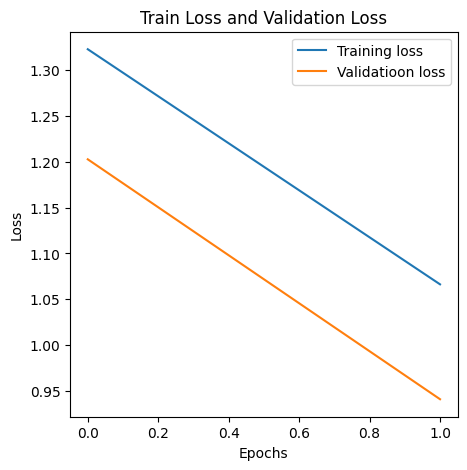

In [97]:
# Plotting the training loss (loss) and validation loss (val_loss)

plt.figure(figsize = (5, 5))
plt.plot(training.history["loss"], label = "Training loss")
plt.plot(training.history["val_loss"], label = "Validation loss")
plt.title("Train Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validatioon loss"], loc = "upper right")
plt.show()

In [98]:
# prediction

pred = model.predict(test_set)
final_pred = np.argmax(pred, axis = 1)

3/3 [==============================] - 10s 2s/step


In [99]:
final_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [100]:
# Now! We can proceed with the development of the model.

model2 = Sequential(
    [
        Input(shape = (224, 224, 3)),
        Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', data_format = None, 
               dilation_rate = (1, 1), groups = 1, activation = "relu", use_bias = True, 
               kernel_initializer = "glorot_uniform", bias_initializer = "zeros", 
               kernel_regularizer = None, bias_regularizer = None, activity_regularizer = None, 
               kernel_constraint = None, bias_constraint = None),
        MaxPooling2D(pool_size = (2, 2), strides = None, padding = "valid", data_format = None),
        Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = "valid", activation = "relu"),
        MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid", data_format = None),
        Flatten(),
        Dropout(0.5),
        Dense(units = 3, activation = "softmax", use_bias = True, kernel_initializer = "glorot_uniform", 
              bias_initializer = "zeros", kernel_regularizer = None, bias_regularizer = None,
              activity_regularizer = None, kernel_constraint = None, bias_constraint = None)
    ]
)

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 108, 108, 32)      0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 373248)            0         
                                                                 
 dropout_3 (Dropout)         (None, 373248)           

In [101]:

# model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "mse"])

# history = model.fit(x = x_train, y = y_train, 
#                     epochs = 5, validation_split = 0.1, 
#                     validation_data = (x_test, y_test), 
#                     shuffle = True)


# Fitting the model

# history = model.fit_generator(
#     train_set,
#     callbacks=[ES],
#     steps_per_epoch = 7 ,
#     epochs = 5, # 100
#     validation_data = val_set
# )


# ES = EarlyStopping(
#     patience = 10,
#     min_delta = 0.001,
#     verbose = 0
# )
# model = Sequential([
#     layers.RandomFlip(mode='horizontal'),
#     layers.RandomRotation(factor=0.2),
#     resnet50,
#     layers.Flatten(),
#     layers.Dense(3, activation='softmax')
# ])
model2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [102]:
# Fitting the model

training2 = model2.fit(
    train_set,
    callbacks=[ES],
    steps_per_epoch = 7 ,
    epochs = 2, # 100
    validation_data = val_set
)

Epoch 1/2
7/7 [==============================] - 19s 2s/step - loss: 1.2247 - accuracy: 0.6269 - val_loss: 0.7439 - val_accuracy: 0.6400
Epoch 2/2
7/7 [==============================] - 14s 2s/step - loss: 0.3377 - accuracy: 0.9005 - val_loss: 0.4299 - val_accuracy: 0.8200


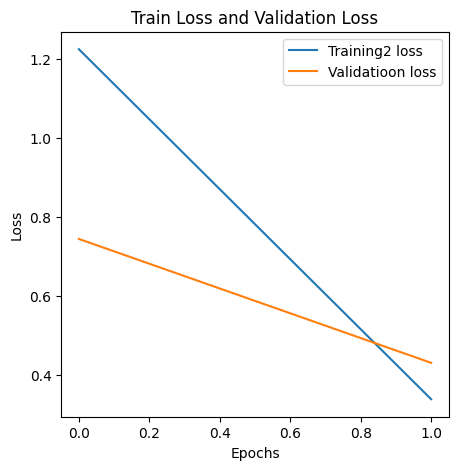

In [103]:
# Plotting the training loss (loss) and validation loss (val_loss)

plt.figure(figsize = (5, 5))
plt.plot(training2.history["loss"], label = "Training loss")
plt.plot(training2.history["val_loss"], label = "Validation loss")
plt.title("Train Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training2 loss", "Validatioon loss"], loc = "upper right")
plt.show()

In [104]:
# Evaluate the model on the test data
loss, accuracy = model2.evaluate(test_set, verbose=1)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3/3 [==============================] - 2s 372ms/step - loss: 0.6529 - accuracy: 0.6667
Test Loss: 0.6528749465942383
Test Accuracy: 0.6666666865348816


In [105]:
# Visualization of predicted data

# prediction

# pred = model.predict(test_set)
# final_pred = np.argmax(pred, axis = 1)

# y_train = train_set.classes 
# y_val = val_set.classes
# y_test = test_set.classes 
# print(train_set.class_indices)
# print("y_train :-", y_train)
# print("y_val :- ", y_val)
# print("y_test :- ", y_test)

# Model prediction
X_test_predictions = model.predict(test_set)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(test_set.classes, axis = 1)

plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_set[i], cmap = "gray")
    plt.title(f"True label :- {y_test_true_labels[i]}", fontsize = 20)
    plt.xlabel(f"Pred label:- {y_test_pred_labels[i]}", fontsize = 20)

plt.tight_layout()
plt.show()

3/3 [==============================] - 8s 2s/step


AxisError: axis 1 is out of bounds for array of dimension 1

3/3 [==============================] - 8s 2s/step


ValueError: num must be an integer with 1 <= num <= 25, not 26

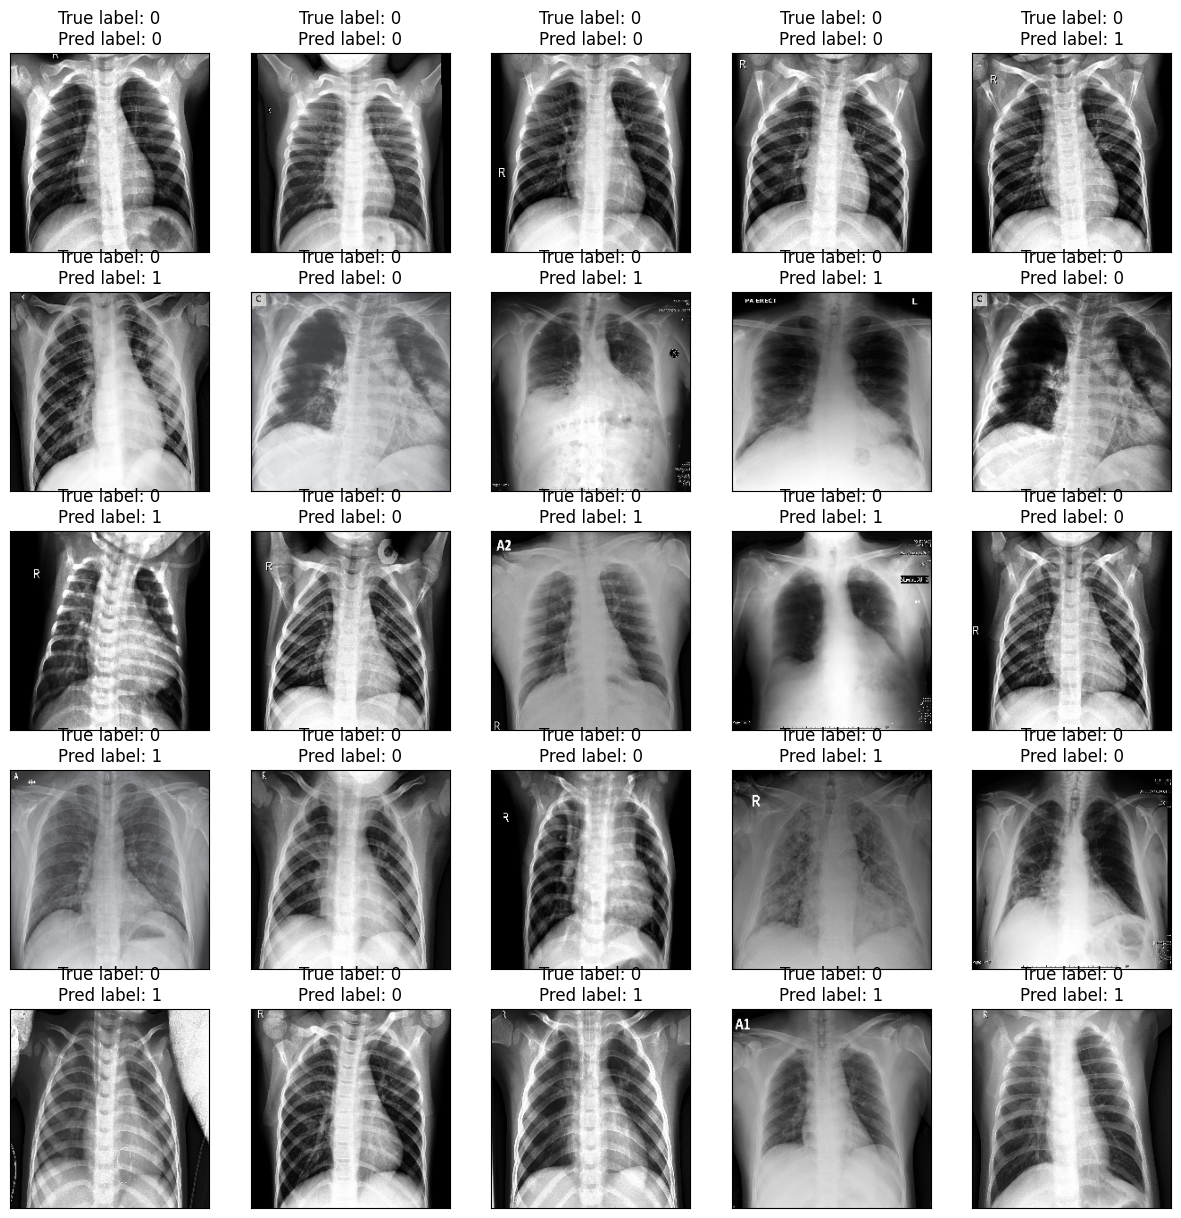

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have model predictions and true labels
X_test_predictions = model.predict(test_set)
y_test_pred_labels = np.argmax(X_test_predictions, axis=1)
y_test_true_labels = test_set.classes

# Get a batch of data from the generator
batch = test_set.next()  # This fetches a batch from the generator

# Determine the number of images in the batch
num_images = batch[0].shape[0]

# Create a grid of subplots
plt.figure(figsize=(15, 15))
for i in range(num_images):  # Iterate over the actual number of images in the batch
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(batch[0][i], cmap="gray")  # Accessing the images in the batch
    plt.title(f"True label: {y_test_true_labels[i]}\nPred label: {y_test_pred_labels[i]}", fontsize=12)

plt.tight_layout()
plt.show()
